# Explore here

## Paso 1: Carga del conjunto de datos

In [1]:
# Your code here
import pandas as pd
url_Con_CSV = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
Datos_Abnb = pd.read_csv(url_Con_CSV)
Datos_Abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [88]:
# Nos piden que convirtamos el raw del CSV en un Archivo
# Eso se hace con el comando "to_csv"
#Le Voy a poner el Nombre que tenia Originalmente "AB_NYC_2019.csv"
#Profesor Leonardo, la direccion Relativa del directorio "data" es ../data ya que el pade de explorer.ipynb esta en src

Datos_Abnb.to_csv("../data/raw/AB_NYC_2019.csv", index = False)


## Paso 2: Realiza un EDA completo

In [89]:
##  See nos pide Realizar un EDA completo
## Segun lo visto en Clases debemos ver la Estructura de los Datos
# Por lo que vamos a hacer Primero un Shape y luego un info 
# En este ejercicio llame al fram que contiene los datos "Datos_Abnb"
Datos_Abnb.shape


(48895, 16)

In [90]:
#
Datos_Abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#Primera Conclusion:
Del info observo que los datos son 48895 Registros con 16 Columnas
Siendo 8 Columnas Categoricas y 8 Numericas

Los campos que estan presentando datos Nulos son los Siguientes:

name                            48879 non-null  object 

host_name                       48874 non-null  object 

last_review                     38843 non-null  object 

reviews_per_month               38843 non-null  float64

In [91]:
duplicados_por_columna = Datos_Abnb.apply(lambda col: col.duplicated(keep=False))
print(duplicados_por_columna)

          id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False     True       True                 True           True   
1      False  False     True       True                 True           True   
2      False  False    False       True                 True           True   
3      False  False    False      False                 True           True   
4      False  False    False       True                 True           True   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False     True       True                 True           True   
48891  False  False     True       True                 True           True   
48892  False  False    False      False                 True           True   
48893  False  False     True       True                 True           True   
48894  False  False    False       True                 True           True   

       latitude  longitude  room_type  price  minim

In [92]:
Ids_Duplicados = Datos_Abnb['id'].duplicated().sum()
print(f"The number of duplicated ID records is: {Ids_Duplicados}")

The number of duplicated ID records is: 0


Yo Esperaba que el "id" fuese unico, y de la prueba lo es.  En cuanto a los otros campos es logico que tengan elementos Dupicados. Como Neighbourhood, numero de Noche, host (puede ser el mismo), incluso la misma Latitud o la misma longitud... Dificulto un caso donde Ambas sean la misma... pero se puede dar en eun Edificio, donde se tengan varios apartamentos.

HAsta ahora lo mas interesante han sido los "Null"

In [93]:
# En la clase recomiendan que antes de empezar a estudiar las grficas y las correlaciones, debemos concentrarnos en las columnas que efectivamente nos den informacion\
# Eso Incluye los "id", que son unicos por ser una clave de busqueda.

Datos_Reducidos=Datos_Abnb.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = False)
Datos_Reducidos.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


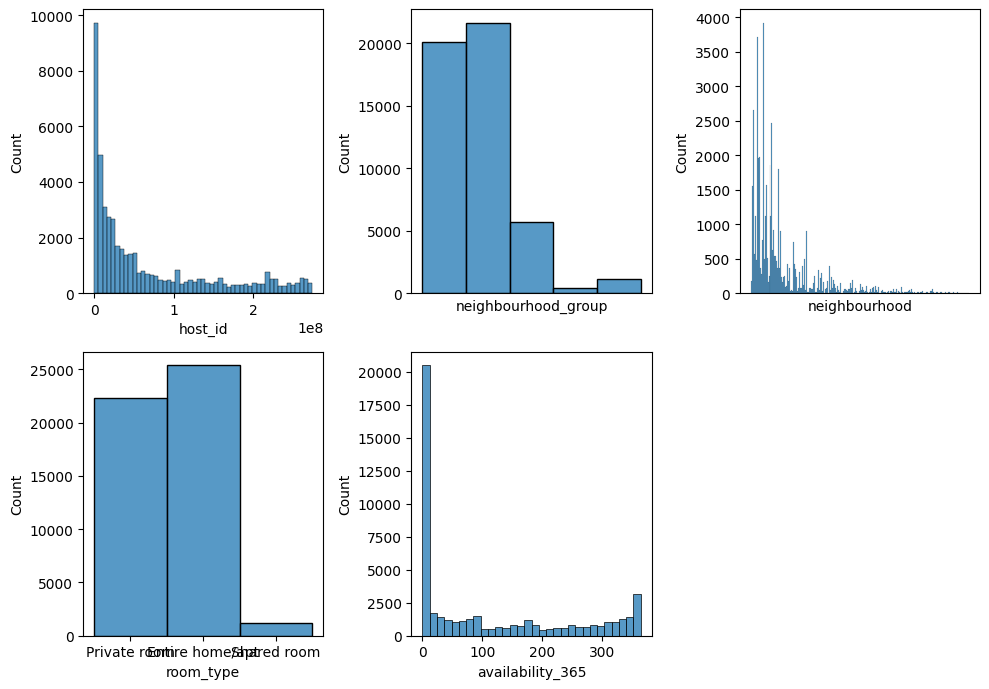

In [94]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = Datos_Reducidos, x = "host_id")
sns.histplot(ax = axis[0,1], data = Datos_Reducidos, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = Datos_Reducidos, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = Datos_Reducidos, x = "room_type")
sns.histplot(ax = axis[1,1], data = Datos_Reducidos, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

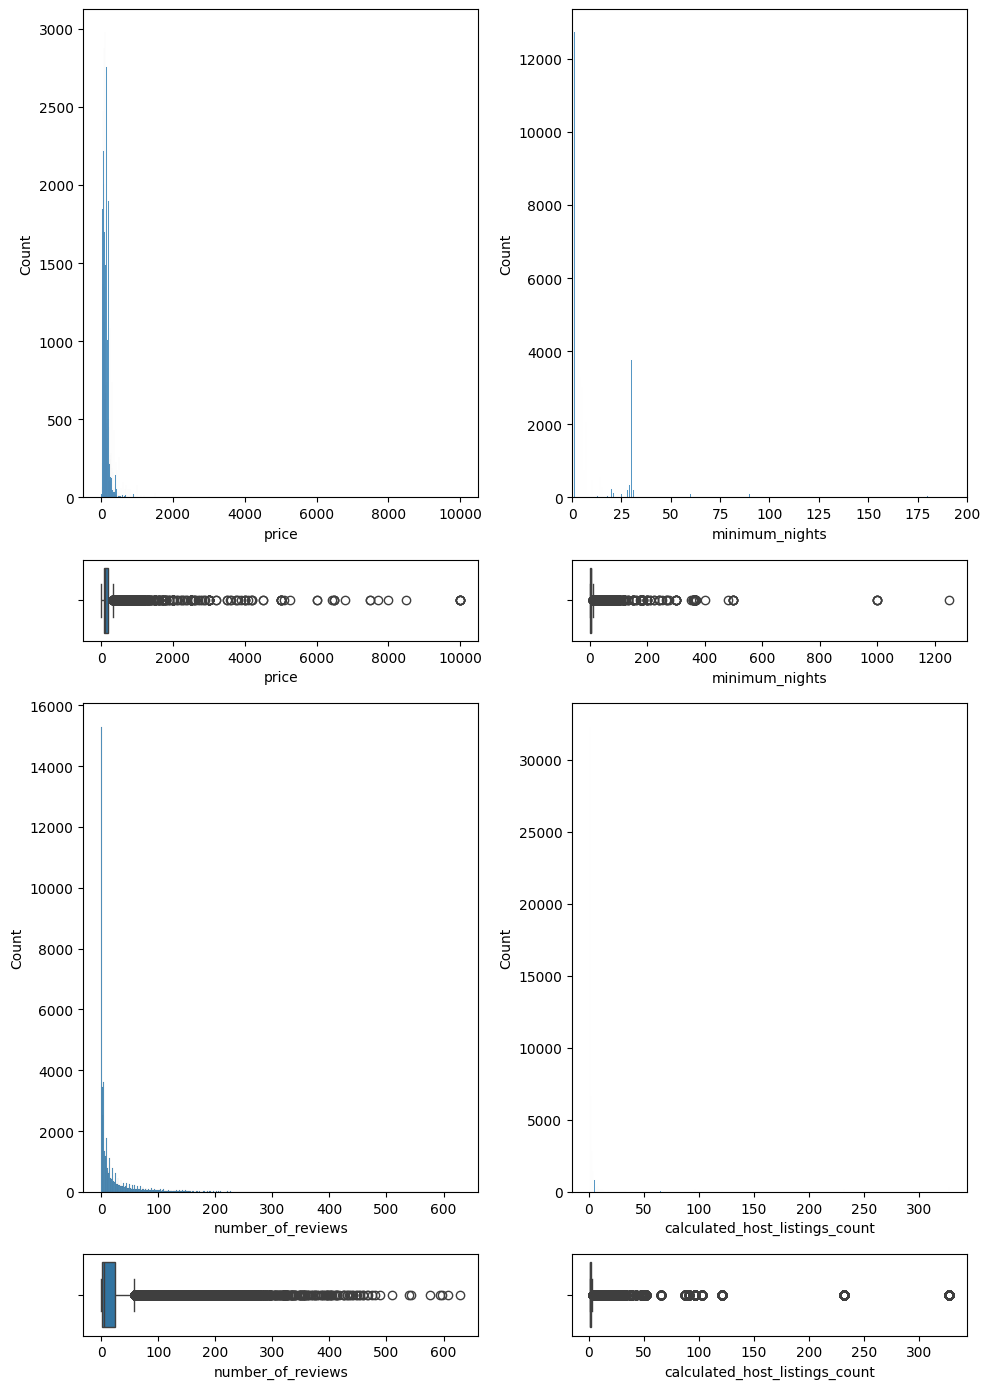

In [95]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = Datos_Reducidos, x = "price")
sns.boxplot(ax = axis[1, 0], data = Datos_Reducidos, x = "price")

sns.histplot(ax = axis[0, 1], data = Datos_Reducidos, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = Datos_Reducidos, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = Datos_Reducidos, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = Datos_Reducidos, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = Datos_Reducidos, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = Datos_Reducidos, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

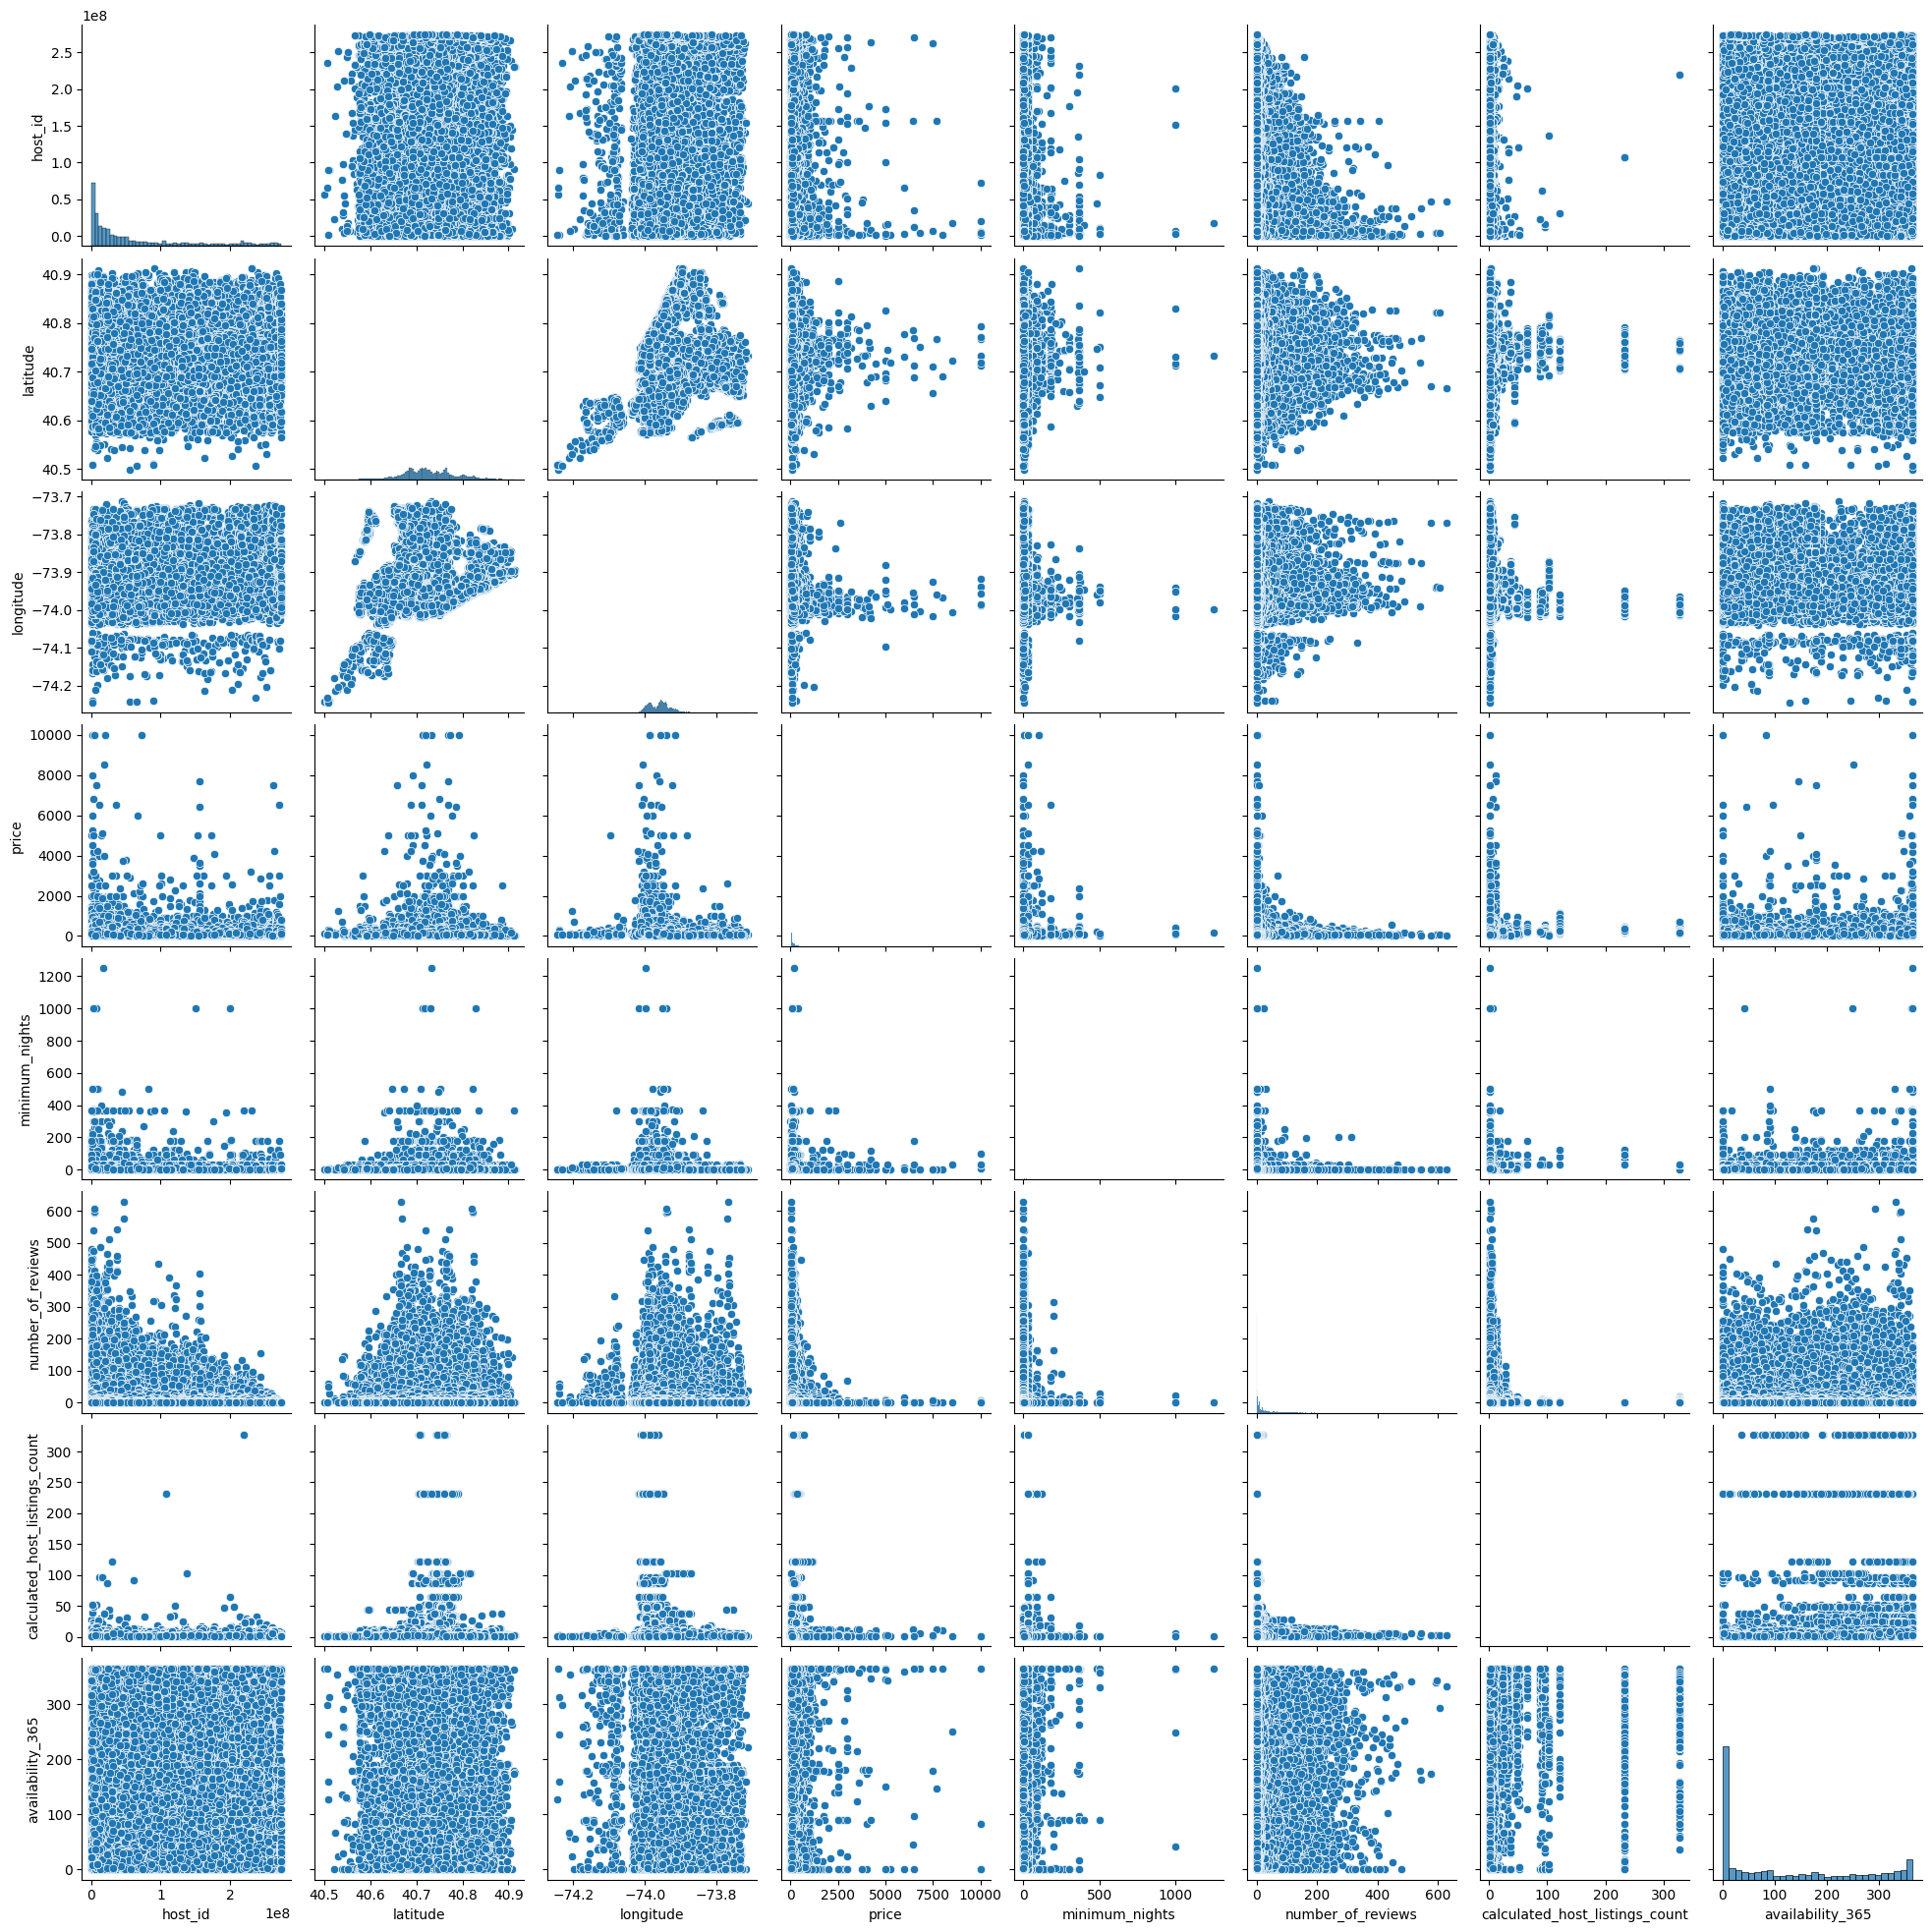

In [96]:
sns.pairplot(data = Datos_Reducidos)